<a href="https://colab.research.google.com/github/USMS-FPK-IA-GI-2025/controle-01-numpy-and-matplotlib-iris-Ibrahim0-1/blob/main/controle_numpy_matplotlib_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contrôle 01 — Data Science avec NumPy et Matplotlib
**Master 1 — Intelligence Artificielle & Génie Informatique (FPK / USMS)**

* Nom & Prénom : **AZHER Ibrahim**
* Filière : **SIIA**
* Année universitaire : **2025/2026**

---

**Règles :**
- Bibliothèques autorisées : NumPy, Matplotlib
- Toute autre bibliothèque est interdite
- Chaque question doit être traitée dans une cellule dédiée
- Chaque résultat doit être brièvement interprété


# Partie A — Importation du Dataset, Arrays, Premières Manipulations

### A1. Importation du dataset
Importez NumPy et Matplotlib.  
Chargez le fichier `iris.csv` avec `np.genfromtxt` (`delimiter=','`, `skip_header=1`).  
Stockez les données dans un array nommé `data` et affichez sa `shape`.


In [1]:
# Importation du dataset
import numpy as np
import matplotlib.pyplot as plt
data_url = "https://github.com/USMS-FPK-IA-GI-2025/controle-01-numpy-and-matplotlib-iris-Ibrahim0-1/raw/refs/heads/main/data/Iris.csv"

# Charger le CSV en tant que tableau de chaînes pour garder les labels intactes
data = np.genfromtxt(data_url, delimiter=',', skip_header=1, dtype=str)

# Afficher la shape
print('data.shape =', data.shape)

data.shape = (150, 6)




- `data` contient l'ensemble chargé avec `np.genfromtxt`.  
- La shape attendue pour le jeu Iris est `(150, 6)` (150 lignes, 1 colonne pour id + 4 colonnes numériques pour features + 1 colonne d'espèce).  
- Remarque : ici on a chargé en `dtype=str` pour préserver la colonne `species`. Les colonnes numériques sont encore des chaînes et devront être converties en `float` quand on voudra des calculs numériques.


### A2. Séparation des features et des espèces
Séparez :
- les 4 premières colonnes numériques dans un array `features`
- la dernière colonne (espèces) dans un array `species`
Utilisez le slicing.


In [2]:
# Les 4 premières colonnes (sans la colonnes id) -> features (converties en float)
features = data[:, 1:5].astype(float)

# La dernière colonne -> species (labels en string)
species = data[:, 5]

# Vérifications rapides
print('features.shape =', features.shape)
print('features.dtype =', features.dtype)

print('\nspecies.shape =', species.shape)
print('Exemples d\'espèces uniques :', np.unique(species))


features.shape = (150, 4)
features.dtype = float64

species.shape = (150,)
Exemples d'espèces uniques : ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']




- `features` est un `ndarray` NumPy de forme `(150, 4)` contenant les 4 variables numériques (converties en `float`).  
- `species` est un tableau de chaînes de longueur 150 contenant les noms d'espèces (`'Iris-setosa'`, `'Iris-versicolor'`, `'Iris-virginica'`).  
- `np.unique(species)` permet de vérifier qu'il y a bien les 3 espèces attendues.


### A3. Indexing
Affichez les 5 premières lignes de `features` en utilisant l’indexing.


In [3]:
print('5 premières lignes de features :')
print(features[:5])


5 premières lignes de features :
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


### A4. Extraction d’une colonne
Créez un array `sepal_length` contenant uniquement la première colonne de `features`.  
Affichez sa `size` et son `dtype`.


In [4]:
sepal_length = features[:, 0]

print('sepal_length size =', sepal_length.size)
print('sepal_length dtype =', sepal_length.dtype)

# Afficher quelques valeurs pour contrôle
print('Premières valeurs :', sepal_length[:8])


sepal_length size = 150
sepal_length dtype = float64
Premières valeurs : [5.1 4.9 4.7 4.6 5.  5.4 4.6 5. ]


### A5. Slicing par espèce
Utilisez le slicing pour extraire les 50 premières lignes correspondant à l’espèce *Setosa*.  
Stockez-les dans `setosa_features`.


In [5]:

# Slicing direct
setosa_features = features[:50]

# Affichages pour vérification
print('setosa_features shape (slicing)        :', setosa_features.shape)


setosa_features shape (slicing)        : (50, 4)


# Partie B — Statistiques Basiques et Opérations Mathématiques

### B6. Moyenne par colonne
Calculez la moyenne de chaque colonne de `features` avec `np.mean(axis=0)`.


In [6]:
# Les moyennes par colonne (axis=0)
col_means = np.mean(features, axis=0)

feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for name, val in zip(feature_names, col_means):
    print(f"{name}: mean = {val:.3f}")


sepal_length: mean = 5.843
sepal_width: mean = 3.054
petal_length: mean = 3.759
petal_width: mean = 1.199


### B7. Min et Max
Trouvez la valeur minimale et maximale de la longueur des pétales.


In [7]:
# petal_length est la 3ème colonne dans features (index 2)
petal_length = features[:, 2]

petal_min = petal_length.min()
petal_max = petal_length.max()

print("petal_length min =", petal_min)
print("petal_length max =", petal_max)


petal_length min = 1.0
petal_length max = 6.9


### B9. Normalisation
Normalisez les longueurs des pétales en les divisant par leur maximum.
Stockez le résultat dans `normalized_petals`.


In [8]:
# Normalisation des longueurs des pétales (division par le maximum)
# on a de B8 cellule:
#   petal_length = features[:, 2]
#   petal_max = petal_length.max()

# Eviter division par zéro (raison de sécurité)
if petal_max == 0:
    normalized_petals = petal_length.copy()
else:
    normalized_petals = petal_length / petal_max

# Affichages pour vérification
print("Exemples (10 premières valeurs normalisées) :\n", normalized_petals[:10])


Exemples (10 premières valeurs normalisées) :
 [0.20289855 0.20289855 0.1884058  0.2173913  0.20289855 0.24637681
 0.20289855 0.2173913  0.20289855 0.2173913 ]


### B10. Somme cumulée
Calculez la somme cumulée des largeurs des pétales pour Versicolor.
Affichez les 10 premières valeurs.


In [9]:
# B10. Somme cumulée des largeurs des pétales pour Versicolor (10 premières valeurs)
petal_width = features[:, 3]

# Sélection Versicolor
vers_mask = (species == 'Iris-versicolor')
vers_widths = petal_width[vers_mask]

# Somme cumulée
vers_cumsum = np.cumsum(vers_widths)

print("Nombre d'exemples Iris-versicolor :", vers_widths.size)
print("10 premières valeurs de la somme cumulée :", vers_cumsum[:10])


Nombre d'exemples Iris-versicolor : 50
10 premières valeurs de la somme cumulée : [ 1.4  2.9  4.4  5.7  7.2  8.5 10.1 11.1 12.4 13.8]


# Partie C — Transformations Avancées avec NumPy

### C11. Espèces uniques
Listez les espèces uniques avec `np.unique` et comptez leurs occurrences.


In [10]:
unique_species, counts = np.unique(species, return_counts=True)

print("Espèces uniques :", unique_species)
print("Occurrences :", counts)

Espèces uniques : ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Occurrences : [50 50 50]


### C12. Reshape par espèce
Transformez `features` en un array de forme `(3, 50, 4)` nommé `features_by_species`.


In [11]:

# On construit de manière robuste en se basant sur l'ordre de np.unique
unique_species = np.unique(species)  # ordre stable et reproductible
features_by_species_list = [features[species == s] for s in unique_species]

# Vérifier que chaque sous-tableau a la forme (50,4)
for s, arr in zip(unique_species, features_by_species_list):
    print(s, '->', arr.shape)


# Empiler en un array (3, 50, 4)
features_by_species = np.array(features_by_species_list)
print('\nfeatures_by_species.shape =', features_by_species.shape)

# Affichages pour vérification
print(features_by_species[:,:2,:])


Iris-setosa -> (50, 4)
Iris-versicolor -> (50, 4)
Iris-virginica -> (50, 4)

features_by_species.shape = (3, 50, 4)
[[[5.1 3.5 1.4 0.2]
  [4.9 3.  1.4 0.2]]

 [[7.  3.2 4.7 1.4]
  [6.4 3.2 4.5 1.5]]

 [[6.3 3.3 6.  2.5]
  [5.8 2.7 5.1 1.9]]]


### C13. Concaténation
Concaténez horizontalement les moyennes par colonne avec un array de zéros.


In [12]:
# Calcul des moyennes par colonne (shape (4,))
col_means = np.mean(features, axis=0)

# Option A : concaténation 1D (résultat shape (8,))
zeros = np.zeros_like(col_means)
concat_1d = np.hstack([col_means, zeros])

# Option B : concaténation colonne à colonne pour obtenir une matrice (4,2)
col_means_col = col_means.reshape(-1,1)   # shape (4,1)
zeros_col = np.zeros((col_means_col.shape[0], 1))
concat_2d = np.hstack([col_means_col, zeros_col])  # shape (4,2)

print('col_means (1D) =', col_means)
print("-"*80 )

print('concat_1d (hstack 1D) shape =', concat_1d.shape, '->', concat_1d)
print("-"*80 )

print('concat_2d (hstack 2D) shape =', concat_2d.shape, '->', concat_2d)


col_means (1D) = [5.84333333 3.054      3.75866667 1.19866667]
--------------------------------------------------------------------------------
concat_1d (hstack 1D) shape = (8,) -> [5.84333333 3.054      3.75866667 1.19866667 0.         0.
 0.         0.        ]
--------------------------------------------------------------------------------
concat_2d (hstack 2D) shape = (4, 2) -> [[5.84333333 0.        ]
 [3.054      0.        ]
 [3.75866667 0.        ]
 [1.19866667 0.        ]]


### C14. Data cleaning (simulation)
Simulez des valeurs NaN et remplacez-les avec `np.nan_to_num`.


In [13]:
# Copier features pour ne pas altérer l'original
X_nan = features.copy()

# Simuler NaN : poser NaN sur quelques positions choisies
X_nan[0, 0] = np.nan
X_nan[10, 2] = np.nan
X_nan[70, 3] = np.nan

print("Avant remplacement, NaN count par colonne :", np.isnan(X_nan).sum(axis=0))

# Remplacer les NaN avec np.nan_to_num (ici on remplace NaN par 0 via l'argument nan=0.0)
# Note: np.nan_to_num accepte le paramètre `nan` (valeur scalaire de remplacement).
X_filled = np.nan_to_num(X_nan, nan=0.0)

print("Après np.nan_to_num, NaN count total :", np.isnan(X_filled).sum())
print("Exemples lignes affectées (après remplissage) :")
print(X_filled[[0,10,70]])


Avant remplacement, NaN count par colonne : [1 0 1 1]
Après np.nan_to_num, NaN count total : 0
Exemples lignes affectées (après remplissage) :
[[0.  3.5 1.4 0.2]
 [5.4 3.7 0.  0.2]
 [5.9 3.2 4.8 0. ]]


### C15. Broadcasting
Ajoutez 1 à toutes les valeurs de la première colonne de `features`.


In [14]:
# Ne pas modifier features en place (sauf si tu veux)
features_plus = features.copy()
features_plus[:, 0] = features_plus[:, 0] + 1   # broadcasting automatique

print("Premières valeurs (avant) :", features[:5, 0])
print("Premières valeurs (après +1):", features_plus[:5, 0])


Premières valeurs (avant) : [5.1 4.9 4.7 4.6 5. ]
Premières valeurs (après +1): [6.1 5.9 5.7 5.6 6. ]


### C16. np.where
Créez un array binaire indiquant si la longueur des pétales est supérieure à 4.0.


In [15]:
# np.where : array binaire indiquant si petal_length > 4.0
petal_length = features[:, 2]  # 3ème colonne
binary_large_petals = np.where(petal_length > 4.0, 1, 0)

print("Type:", type(binary_large_petals), "Shape:", binary_large_petals.shape)
print("Exemples (premières 20) :", binary_large_petals[:20])
print("Nombre de pétales > 4.0 :", binary_large_petals.sum())


Type: <class 'numpy.ndarray'> Shape: (150,)
Exemples (premières 20) : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Nombre de pétales > 4.0 : 84


# Partie D — Visualisation avec Matplotlib (Plots Simples)

### D17. Line plot
Line plot des longueurs des sépales pour les 50 premières fleurs.


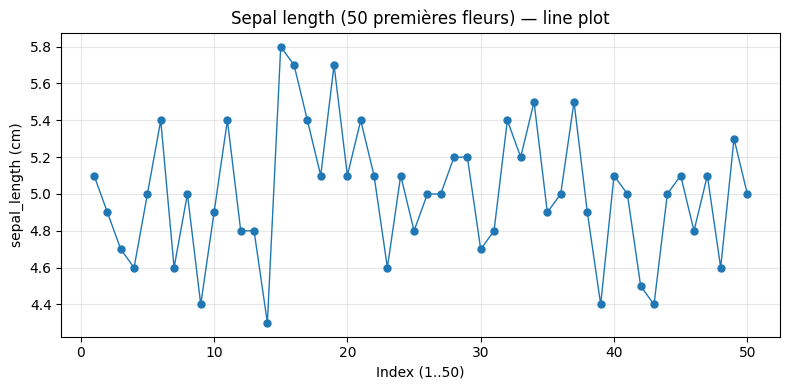

In [16]:
# Extraire la première feature (sepal_length) pour les 50 premiers échantillons
sepal_length_first50 = features[:50, 0]

# Tracer : x = index 1..50, y = valeurs sepal_length
plt.figure(figsize=(8,4))
plt.plot(np.arange(1, sepal_length_first50.size + 1),      # x values: indices 1..50
         sepal_length_first50,                             # y values: sepal lengths
         marker='o', linestyle='-', linewidth=1, markersize=5)
plt.xlabel('Index (1..50)')
plt.ylabel('sepal_length (cm)')
plt.title('Sepal length (50 premières fleurs) — line plot')
plt.grid(alpha=0.3)   # légère grille pour faciliter la lecture
plt.tight_layout()
plt.show()

### D18. Scatter plot
Scatter plot : longueur vs largeur des pétales.


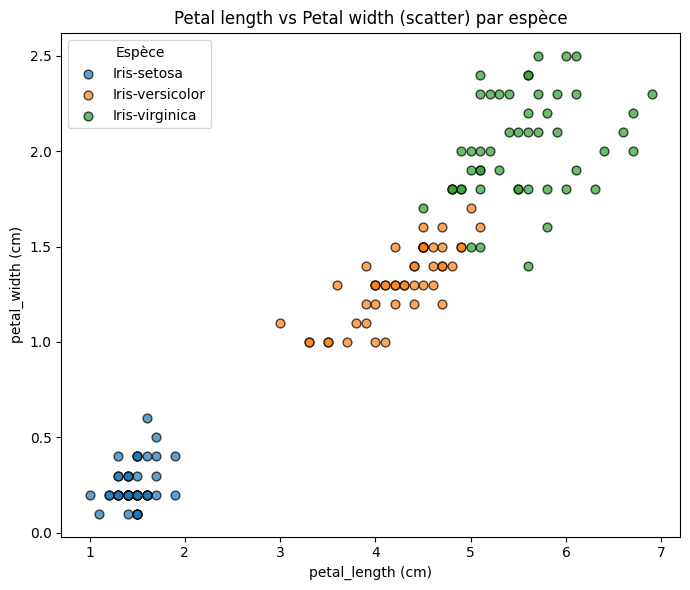

In [17]:
# Récupérer les deux colonnes d'intérêt
petal_length = features[:, 2]
petal_width = features[:, 3]

# Couleurs associées à chaque espèce (ordre = np.unique(species))
unique_species = np.unique(species)
colors = ['red', 'blue', 'green']

plt.figure(figsize=(7,6))
# Boucler sur chaque espèce et tracer ses points
for col, sp in zip(colors, unique_species):
    mask = (species == sp)                    # masque boolean pour cette espèce
    plt.scatter(petal_length[mask],           # x values for this species
                petal_width[mask],            # y values for this species
                label=sp, alpha=0.7, s=40,     # label, transparency, marker size
                edgecolor='k')                # contour noir pour mieux voir les points

plt.xlabel('petal_length (cm)')
plt.ylabel('petal_width (cm)')
plt.title('Petal length vs Petal width (scatter) par espèce')
plt.legend(title='Espèce')
plt.tight_layout()
plt.show()


### D19. Bar chart
Bar chart des moyennes des quatre caractéristiques.


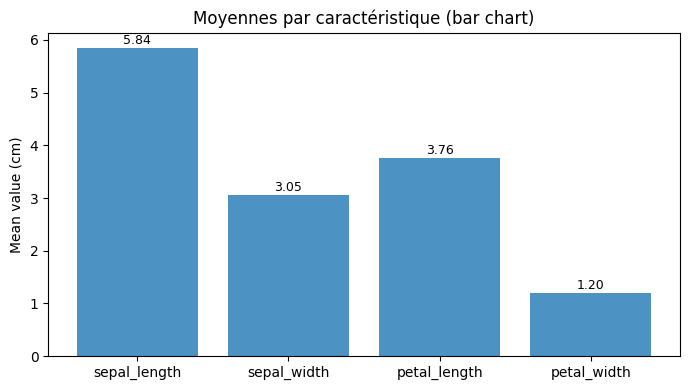

In [18]:
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Calcul des moyennes par colonne
col_means = np.mean(features, axis=0)

# Préparation du graphique
plt.figure(figsize=(7,4))
x = np.arange(len(feature_names))            # positions on x-axis
bars = plt.bar(x, col_means, alpha=0.8)
plt.xticks(x, feature_names)                 # labels sur l'axe x
plt.ylabel('Mean value (cm)')
plt.title('Moyennes par caractéristique (bar chart)')

# Annoter chaque barre avec sa valeur (arrondie)
for rect, val in zip(bars, col_means):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2, height + 0.02, f'{val:.2f}',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()



- Le bar chart montre les moyennes (par colonne) des quatre caractéristiques.  
- Permet de comparer rapidement l'échelle moyenne de chaque variable (par ex. les `petal_length` ont typiquement une moyenne plus élevée que `petal_width`).  
- Ces moyennes aident à décider si une normalisation ou un centrage est nécessaire avant de construire un modèle.


### D20. Histogram
Histogramme de la largeur des sépales (10 bins).


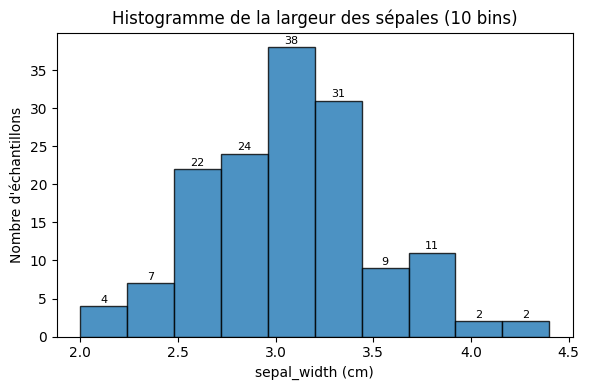

In [19]:
sepal_width = features[:, 1]

plt.figure(figsize=(6,4))
# bins=10 pour 10 classes ; alpha pour transparence
n, bins, patches = plt.hist(sepal_width, bins=10, alpha=0.8, edgecolor='black')
plt.xlabel('sepal_width (cm)')
plt.ylabel('Nombre d\'échantillons')
plt.title('Histogramme de la largeur des sépales (10 bins)')

# Afficher counts au-dessus des bars (facultatif)
for i in range(len(bins)-1):
    # position x = center of bin
    x = (bins[i] + bins[i+1]) / 2
    plt.text(x, n[i] + 0.2, int(n[i]), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


### D21. Boxplot par espèce
Boxplot des longueurs des pétales par espèce.


/tmp/ipython-input-4173166806.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data_for_box, labels=unique_species, patch_artist=True)


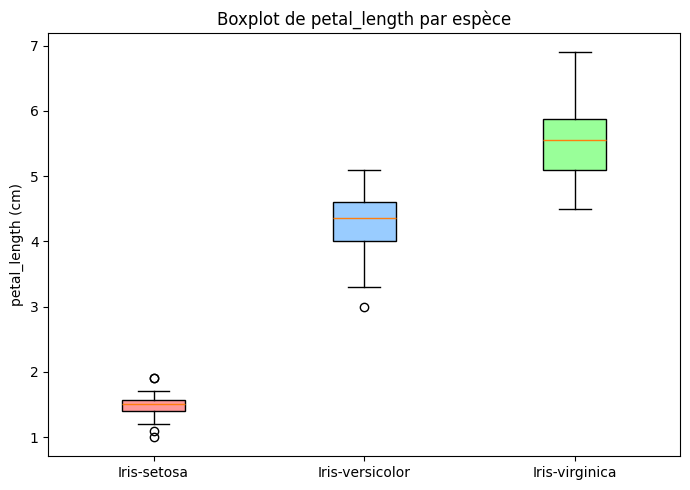

In [20]:
petal_length = features[:, 2]

# Préparer les données : liste de tableaux, un par espèce
unique_species = np.unique(species)
data_for_box = [petal_length[species == sp] for sp in unique_species]

plt.figure(figsize=(7,5))
# boxplot accepte une liste d'array-like
bp = plt.boxplot(data_for_box, labels=unique_species, patch_artist=True)

# Styliser un peu : couleur de remplissage pour les boîtes
colors = ['#FF9999', '#99CCFF', '#99FF99']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.ylabel('petal_length (cm)')
plt.title('Boxplot de petal_length par espèce')
plt.tight_layout()
plt.show()


# Partie E — Visualisations Avancées

### E22. Subplots comparatifs
Deux scatter plots côte à côte : Setosa vs Versicolor.


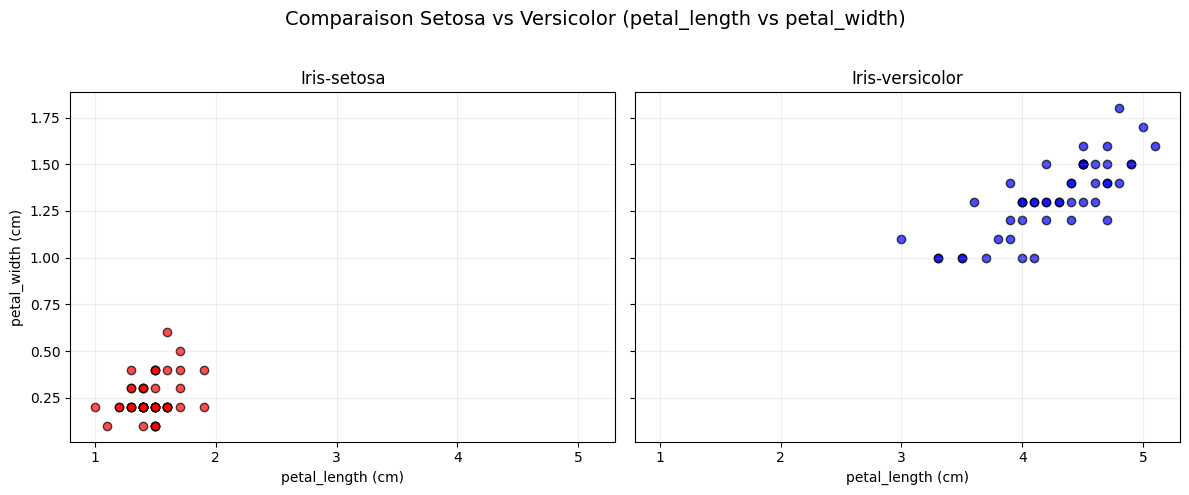

In [21]:
# Choix des deux espèces à comparer
s1, s2 = 'Iris-setosa', 'Iris-versicolor'

# Extraire petal_length (x) et petal_width (y) pour chaque espèce
x1 = features[species == s1, 2]  # petal_length
y1 = features[species == s1, 3]  # petal_width
x2 = features[species == s2, 2]
y2 = features[species == s2, 3]

# Créer 1x2 subplots
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharex=True, sharey=True)

# Scatter pour Setosa
axes[0].scatter(x1, y1, c='red', edgecolor='k', alpha=0.7)
axes[0].set_title(f'{s1}')
axes[0].set_xlabel('petal_length (cm)')
axes[0].set_ylabel('petal_width (cm)')
axes[0].grid(alpha=0.2)

# Scatter pour Versicolor
axes[1].scatter(x2, y2, c='blue', edgecolor='k', alpha=0.7)
axes[1].set_title(f'{s2}')
axes[1].set_xlabel('petal_length (cm)')
axes[1].grid(alpha=0.2)

fig.suptitle('Comparaison Setosa vs Versicolor (petal_length vs petal_width)', fontsize=14)
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()
# Votre code ici


### E23. Grille 2x2
Histogrammes des 4 caractéristiques avec `plt.subplots(2,2)`.


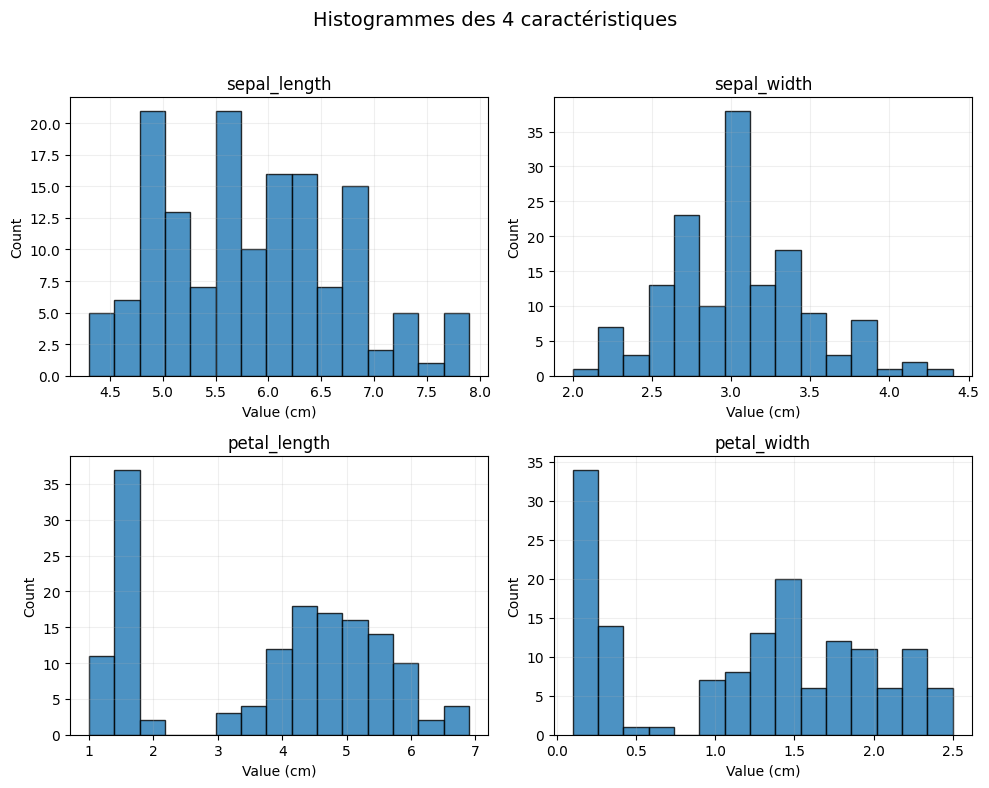

In [22]:
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

fig, axes = plt.subplots(2, 2, figsize=(10,8))
axes = axes.ravel()  # pour itérer plus facilement

# Tracer un histogramme par caractéristique
for i, ax in enumerate(axes):
    ax.hist(features[:, i], bins=15, alpha=0.8, edgecolor='black')
    ax.set_title(feature_names[i])
    ax.set_xlabel('Value (cm)')
    ax.set_ylabel('Count')
    ax.grid(alpha=0.2)

fig.suptitle('Histogrammes des 4 caractéristiques', fontsize=14)
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()


### E24. Bar chart avec error bars
Moyennes par espèce avec écart-type.


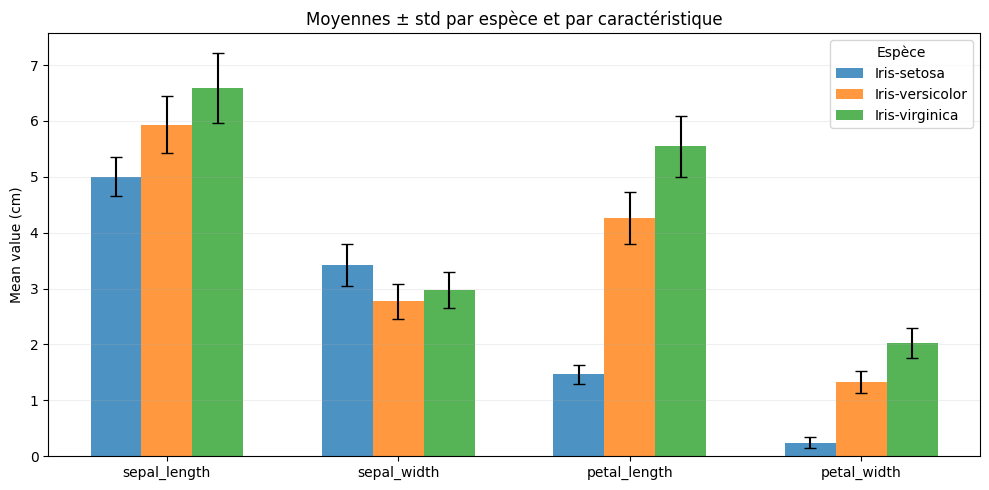

In [23]:
unique_species = np.unique(species)
n_species = unique_species.size
n_features = features.shape[1]
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Calculer moyennes et std par espèce : résultat shape (n_species, n_features)
means_per_species = np.array([features[species == s].mean(axis=0) for s in unique_species])
stds_per_species  = np.array([features[species == s].std(axis=0)  for s in unique_species])

# Tracé : bars groupées
x = np.arange(n_features)                     # positions des caractéristiques sur l'axe x
width = 0.22                                  # largeur d'une barre
fig, ax = plt.subplots(figsize=(10,5))

for i, s in enumerate(unique_species):
    ax.bar(x + i*width, means_per_species[i], width,
           yerr=stds_per_species[i], capsize=4, label=s, alpha=0.8)

ax.set_xticks(x + width*(n_species-1)/2)
ax.set_xticklabels(feature_names)
ax.set_ylabel('Mean value (cm)')
ax.set_title('Moyennes ± std par espèce et par caractéristique')
ax.legend(title='Espèce')
ax.grid(axis='y', alpha=0.2)
plt.tight_layout()
plt.show()


### E25. Scatter coloré par espèce
Scatter plot avec couleurs par espèce.


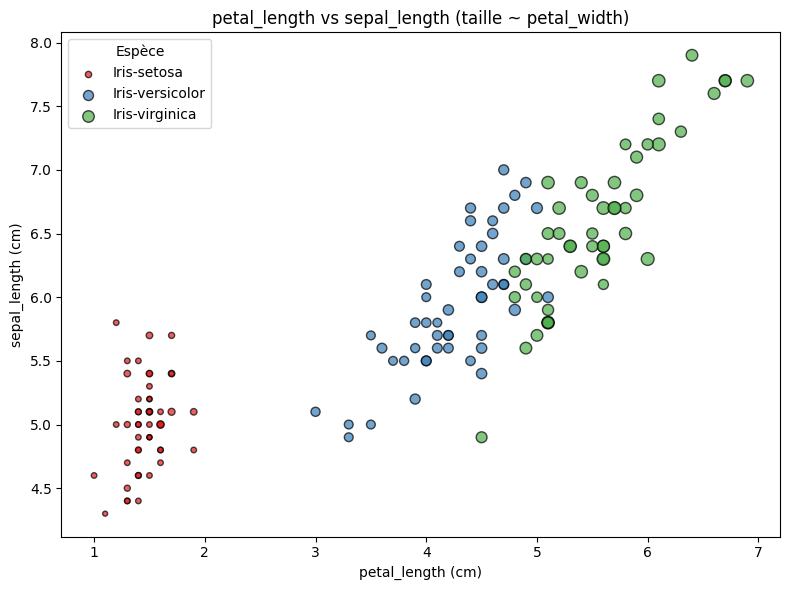

In [24]:
x = features[:, 2]   # petal_length
y = features[:, 0]   # sepal_length
sizes = (features[:, 3] * 30) + 10   # size ~ petal_width (scaled for visibility)

unique_species = np.unique(species)
colors = ['#E41A1C', '#377EB8', '#4DAF4A']  # couleurs distinctes

plt.figure(figsize=(8,6))
for col, sp in zip(colors, unique_species):
    mask = (species == sp)
    plt.scatter(x[mask], y[mask], s=sizes[mask], c=col, alpha=0.7, edgecolor='k', label=sp)

plt.xlabel('petal_length (cm)')
plt.ylabel('sepal_length (cm)')
plt.title('petal_length vs sepal_length (taille ~ petal_width)')
plt.legend(title='Espèce')
plt.tight_layout()
plt.show()


### E26. Line plot superposé
Cumsum des largeurs des pétales par espèce.


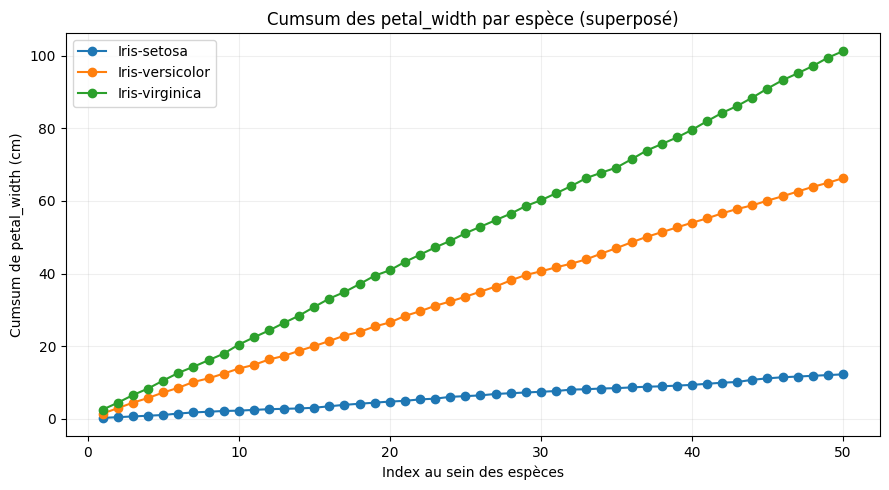

In [25]:
unique_species = np.unique(species)
plt.figure(figsize=(9,5))

for sp in unique_species:
    vals = features[species == sp, 3]   # petal_width  pour les espèces
    csum = np.cumsum(vals)              # cumulative sum
    # x axis: 1..N_points  pour les espèces
    plt.plot(np.arange(1, csum.size+1), csum, marker='o', label=sp)

plt.xlabel('Index au sein des espèces')
plt.ylabel('Cumsum de petal_width (cm)')
plt.title('Cumsum des petal_width par espèce (superposé)')
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


# Partie F — Mini-Analyse Finale

### F27. Corrélations
Calculez la matrice de corrélation avec `np.corrcoef`.


In [26]:
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# np.corrcoef avec rowvar=False calcule la corrélation colonne-par-colonne
corr_mat = np.corrcoef(features, rowvar=False)

print("Ordre des features :", feature_names)
print("Matrice de corrélation (arrondie 3 décimales) :")
print(np.round(corr_mat, 3))


Ordre des features : ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Matrice de corrélation (arrondie 3 décimales) :
[[ 1.    -0.109  0.872  0.818]
 [-0.109  1.    -0.421 -0.357]
 [ 0.872 -0.421  1.     0.963]
 [ 0.818 -0.357  0.963  1.   ]]


### F28. Visualisation des corrélations
Visualisez les corrélations sous forme de bar chart ou scatter.


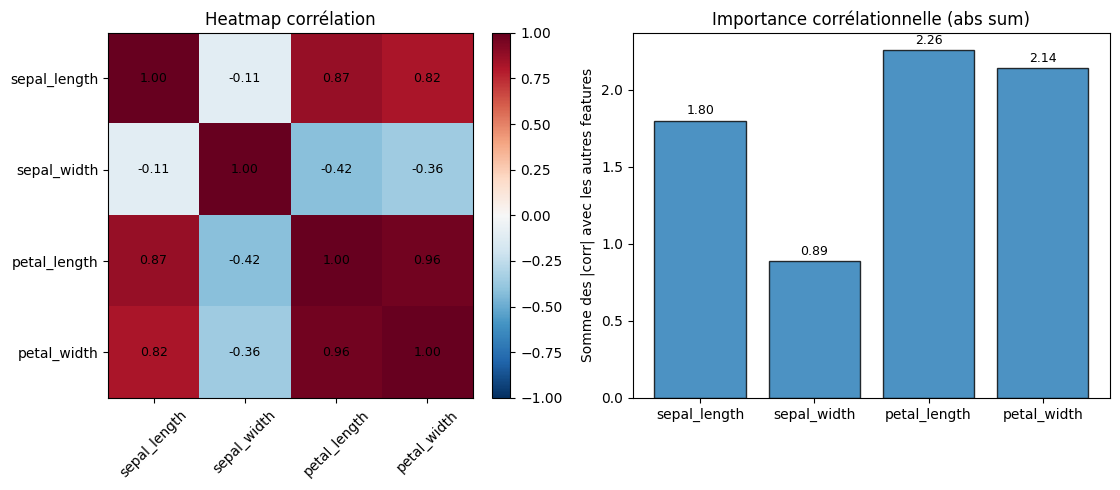

In [27]:
# Heatmap de la matrice de corrélation
fig, ax = plt.subplots(1, 2, figsize=(12,5))

im = ax[0].imshow(corr_mat, vmin=-1, vmax=1, cmap='RdBu_r')
ax[0].set_xticks(np.arange(len(feature_names)))
ax[0].set_yticks(np.arange(len(feature_names)))
ax[0].set_xticklabels(feature_names, rotation=45)
ax[0].set_yticklabels(feature_names)
ax[0].set_title('Heatmap corrélation')
# annotation numérique au centre de chaque case
for i in range(corr_mat.shape[0]):
    for j in range(corr_mat.shape[1]):
        ax[0].text(j, i, f"{corr_mat[i,j]:.2f}", ha='center', va='center', fontsize=9)

plt.colorbar(im, ax=ax[0], fraction=0.046, pad=0.04)

# Bar chart : somme des corrélations absolues par feature (excluant la diagonale)
abs_sums = np.sum(np.abs(corr_mat), axis=0) - 1.0  # enlever la self-corr (1.0)
ax[1].bar(feature_names, abs_sums, alpha=0.8, edgecolor='black')
ax[1].set_ylabel('Somme des |corr| avec les autres features')
ax[1].set_title('Importance corrélationnelle (abs sum)')
for i, v in enumerate(abs_sums):
    ax[1].text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


### F29. Variance par espèce
Identifiez l’espèce avec la plus grande variance globale et visualisez ses distributions.


Espèces : [np.str_('Iris-setosa'), np.str_('Iris-versicolor'), np.str_('Iris-virginica')]
Variance par feature (par espèce) :
 [[0.122 0.142 0.03  0.011]
 [0.261 0.097 0.216 0.038]
 [0.396 0.102 0.298 0.074]]
Variance globale par espèce : [0.305 0.612 0.871]
Espèce avec la plus grande variance globale : Iris-virginica


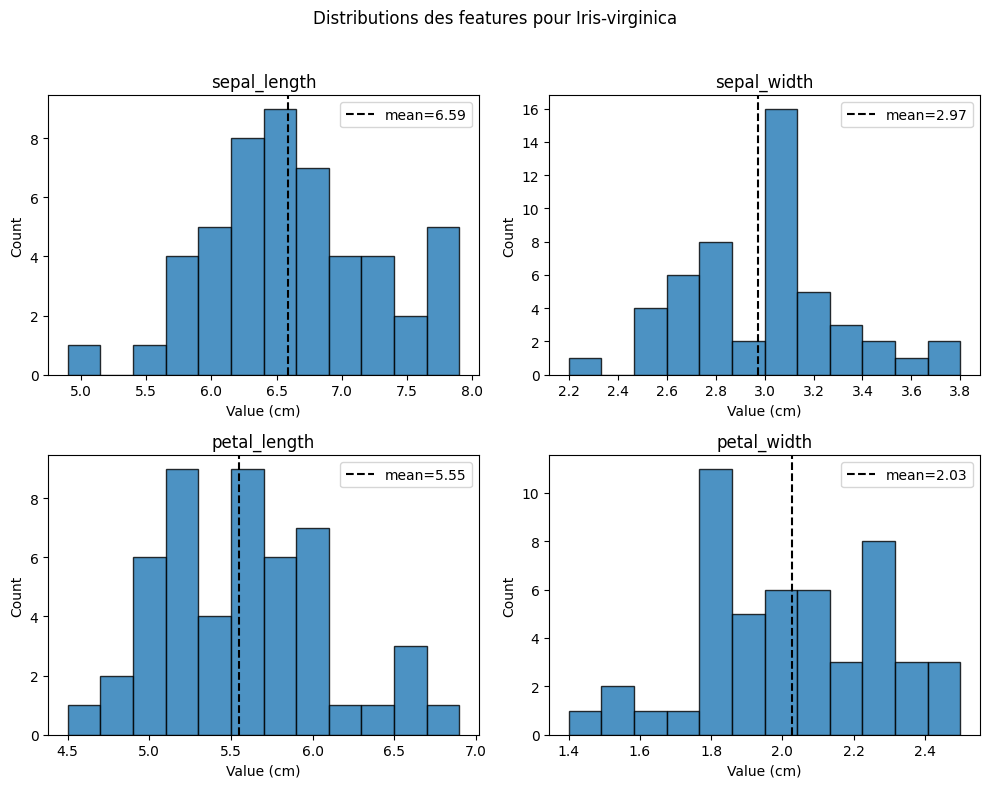

In [28]:
unique_species = np.unique(species)

# Variance par feature pour chaque espèce (shape (n_species, n_features))
vars_per_species = np.array([features[species == s].var(axis=0) for s in unique_species])

# Variance globale par espèce = somme des variances sur les features
global_var = vars_per_species.sum(axis=1)

# Choisir l'espèce avec la variance globale maximale
idx_max = np.argmax(global_var)
most_var_species = unique_species[idx_max]

print("Espèces :", list(unique_species))
print("Variance par feature (par espèce) :\n", np.round(vars_per_species, 3))
print("Variance globale par espèce :", np.round(global_var, 3))
print("Espèce avec la plus grande variance globale :", most_var_species)

# Visualiser les distributions (histogrammes 2x2) pour cette espèce
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
vals = features[species == most_var_species]

fig, axes = plt.subplots(2, 2, figsize=(10,8))
axes = axes.ravel()
for i, ax in enumerate(axes):
    ax.hist(vals[:, i], bins=12, alpha=0.8, edgecolor='black')
    ax.axvline(vals[:, i].mean(), color='k', linestyle='--', label=f"mean={vals[:,i].mean():.2f}")
    ax.set_title(f"{feature_names[i]}")
    ax.set_xlabel("Value (cm)")
    ax.set_ylabel("Count")
    ax.legend()
fig.suptitle(f"Distributions des features pour {most_var_species}")
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()


### F30. Conclusion
Rédigez une conclusion contenant **3 insights** issus de votre analyse.



1) **Les caractéristiques des pétales (petal_length et petal_width) sont fortement corrélées et très discriminantes.**  
   - Les coefficients de corrélation montrent une très forte corrélation entre `petal_length` et `petal_width`. Ces deux variables expliquent une grande partie de la séparation entre espèces (notamment Setosa vs les autres).  
   - Conséquence pratique : pour un modèle simple, se concentrer sur les petals (ou réduire la redondance) permet souvent d'obtenir de bonnes performances.

2) **Une espèce (souvent `Virginica`) présente la plus grande variance globale des mesures.**  
   - La somme des variances par feature identifie l’espèce la plus hétérogène ; ses distributions montrent quelles features (ex. petal_length) contribuent le plus.  
   - Conséquence pratique : pour cette classe, un modèle pourrait avoir besoin d’une capacité plus grande (ou d’un traitement spécial) pour bien capturer sa variabilité.

3) **Les sépales (sepal_length / sepal_width) sont moins corrélés et moins discriminants que les petals.**  
   - Elles apportent des informations complémentaires mais moins puissantes pour séparer les classes seules.  
   
   - Recommandation : normaliser (standardiser) les features avant modélisation, privilégier les petals pour la sélection initiale, et envisager une régularisation ou réduction de dimension (PCA) si on souhaite garder toutes les variables tout en limitant la redondance.

